# Palantir pseudotime on mouse embryonic fibroblasts

## Library imports

In [1]:
import os
import sys

import pandas as pd
from scipy.stats import spearmanr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import cellrank as cr
import palantir
import scanpy as sc
import scvelo as scv

sys.path.insert(0, "../../../")
from paths import DATA_DIR, FIG_DIR  # isort: skip  # noqa: E402

Global seed set to 0
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


## General settings

In [2]:
# set verbosity levels
sc.settings.verbosity = 2
scv.settings.verbosity = 3

In [3]:
mpl.use("module://matplotlib_inline.backend_inline")
mpl.rcParams["backend"]

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

In [4]:
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=20, color_map="viridis")

In [5]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    os.makedirs(FIG_DIR / "realtime_kernel" / "mef", exist_ok=True)

## Data loading

In [6]:
adata = cr.datasets.reprogramming_schiebinger(DATA_DIR / "mef" / "reprogramming_schiebinger.h5ad")
adata = adata[adata.obs["serum"] == "True"].copy()

adata.obs["day"] = adata.obs["day"].astype(float)
adata.uns["cell_sets_colors"] = sns.color_palette("colorblind").as_hex()[: len(adata.obs["cell_sets"].cat.categories)]

adata

AnnData object with n_obs × n_vars = 165892 × 19089
    obs: 'day', 'MEF.identity', 'Pluripotency', 'Cell.cycle', 'ER.stress', 'Epithelial.identity', 'ECM.rearrangement', 'Apoptosis', 'SASP', 'Neural.identity', 'Placental.identity', 'X.reactivation', 'XEN', 'Trophoblast', 'Trophoblast progenitors', 'Spiral Artery Trophpblast Giant Cells', 'Spongiotrophoblasts', 'Oligodendrocyte precursor cells (OPC)', 'Astrocytes', 'Cortical Neurons', 'RadialGlia-Id3', 'RadialGlia-Gdf10', 'RadialGlia-Neurog2', 'Long-term MEFs', 'Embryonic mesenchyme', 'Cxcl12 co-expressed', 'Ifitm1 co-expressed', 'Matn4 co-expressed', '2-cell', '4-cell', '8-cell', '16-cell', '32-cell', 'cell_growth_rate', 'serum', '2i', 'major_cell_sets', 'cell_sets', 'batch'
    var: 'highly_variable', 'TF'
    uns: 'batch_colors', 'cell_sets_colors', 'day_colors', 'major_cell_sets_colors'
    obsm: 'X_force_directed'

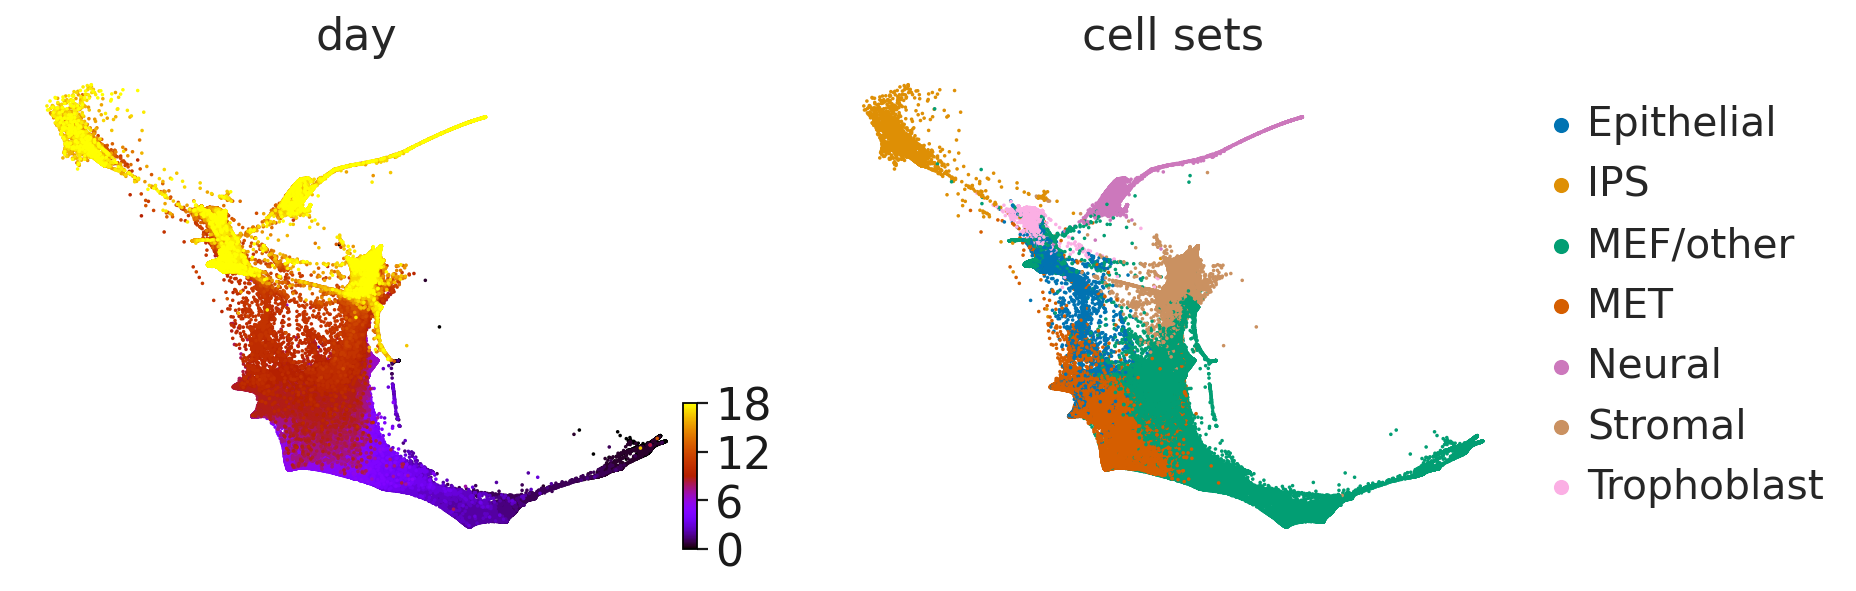

In [7]:
scv.pl.scatter(adata, basis="force_directed", c=["day", "cell_sets"], legend_loc="right", cmap="gnuplot")

## Data pre-processing

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, random_state=0)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:15)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:40)


## Palantir pseudotime construction

In [9]:
pc_projection = pd.DataFrame(adata.obsm["X_pca"].copy(), index=adata.obs_names)

In [10]:
# diffusion maps
diff_maps = palantir.utils.run_diffusion_maps(pc_projection, n_components=5)

Determing nearest neighbor graph...
computing neighbors
    finished (0:00:34)


In [11]:
# multiscale space
multiscale_space = palantir.utils.determine_multiscale_space(diff_maps)

In [12]:
magic_imputed = palantir.utils.run_magic_imputation(adata, diff_maps)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Fa

In [13]:
# See DPT notebook for root cell identification
root_idx = 433
palantir_res = palantir.core.run_palantir(
    multiscale_space, adata.obs_names[root_idx], use_early_cell_as_start=True, num_waypoints=500
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.21045298576354982 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not 

Time for shortest paths: 2.044468887646993 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [14]:
adata.obs["palantir_pseudotime"] = palantir_res.pseudotime

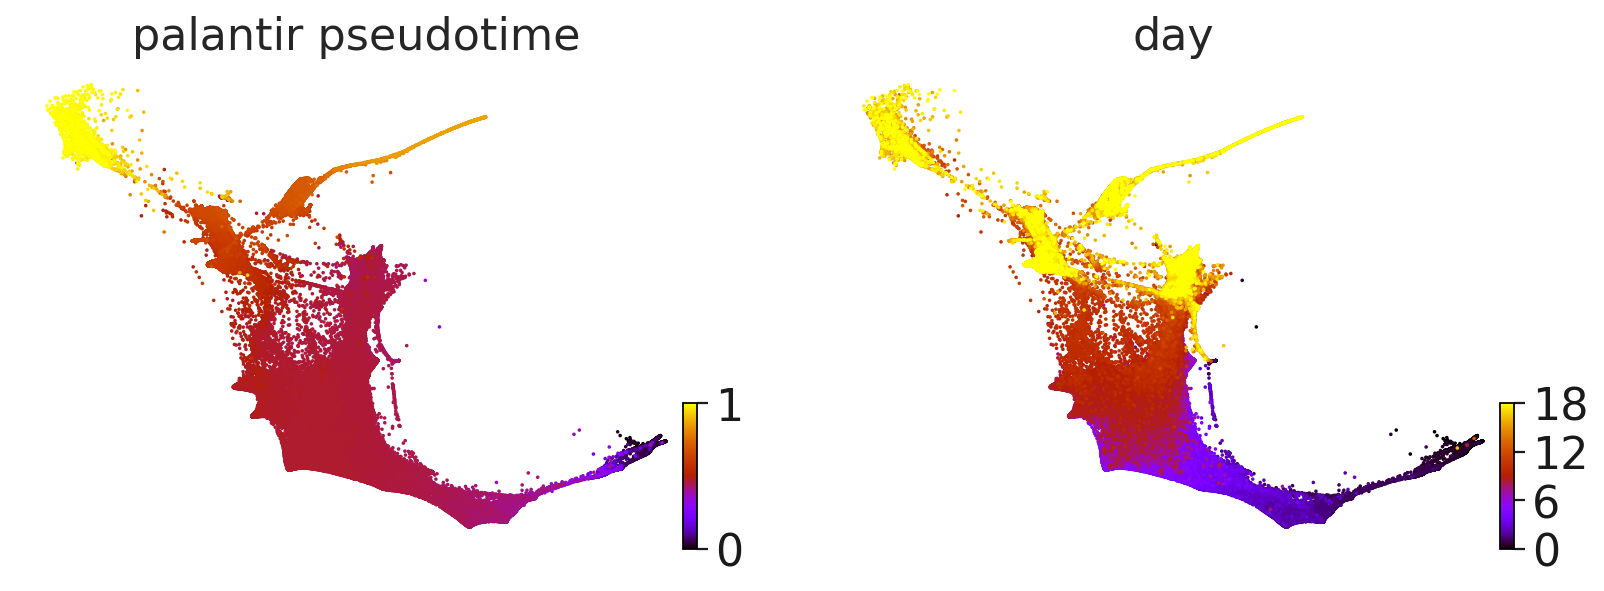

In [15]:
scv.pl.scatter(
    adata,
    c=["palantir_pseudotime", "day"],
    basis="force_directed",
    legend_loc=False,
    color_map="gnuplot",
)

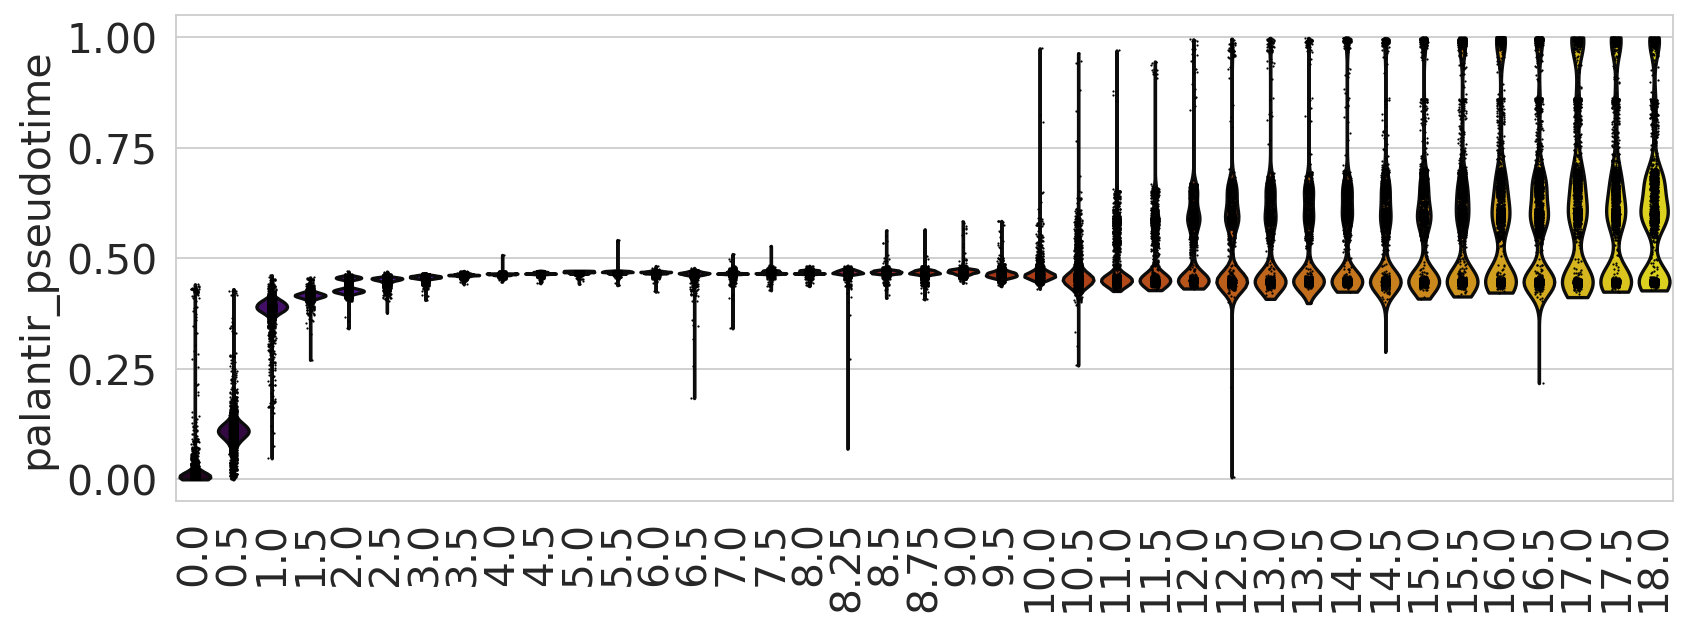

In [16]:
adata.obs["day"] = adata.obs["day"].astype("category")

sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 4))
sc.pl.violin(adata, keys=["palantir_pseudotime"], groupby="day", rotation=90, ax=ax)

if SAVE_FIGURES:
    ax.hlines([0, 0.25, 0.5, 0.75, 1], xmin=-0.75, xmax=39, linestyles="solid", colors="black", zorder=0)
    ax.axis("off")
    fig.savefig(
        FIG_DIR / "realtime_kernel" / "mef" / "palantir_vs_time_point.eps",
        format="eps",
        transparent=True,
        bbox_inches="tight",
    )

sns.reset_orig()

In [17]:
spearmanr(adata.obs["palantir_pseudotime"].values, adata.obs["day"].astype(float).values)

SignificanceResult(statistic=0.45170713029468024, pvalue=0.0)